## Imports

In [1]:
import dataframetransform as cleandata
import dataframeinfo as info
import plotter as plots

## Load and transform initial data

In [3]:
# Assign dataframe and list of columns to review to variables. 
loans = cleandata.loans
cols_transform = cleandata.cols_to_transform # List coluns to apply the Box-Cox transformation to.

In [4]:
# Create new instance of the DataFrameTransform class
loans_transform = cleandata.DataFrameTransform(loans)
# Identify subgroup of columns that contain zeroes.
zero_cols = loans.columns[(loans == 0).any()]
zero_cols = list(zero_cols) # All zero-containing columns in the dataframe.
cols_add_constant = [col for col in cols_transform if col in zero_cols] # Columns for transformation that contain zeroes. 
# Add constant to zero-containing columns.
loans_transform.add_constant(cols_add_constant, 1)
# Run transformation
for col in cols_transform:
    loans_transform.box_cox_transform(col)

# Log transformation
loans_transform.log_transform('inq_last_6mths')

## Check initial data

In [6]:
# Check whole dataframe.
loans.head(4)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,68.070671,66.744573,118.539549,36.0,7.49,16.255871,A,A4,...,0.0,0.0,0.0,2022-01-01,5.182531,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,82.089586,80.380914,148.523308,36.0,6.99,19.762689,A,A3,...,0.0,0.0,0.0,2022-01-01,5.612876,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,88.184663,86.303623,161.928696,36.0,7.49,21.358690,A,A4,...,0.0,0.0,0.0,2021-10-01,8.496794,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,86.092537,84.271045,157.303476,36.0,14.31,21.642745,C,C4,...,0.0,0.0,0.0,2021-06-01,8.559799,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL


In [7]:
# Check modified columns.
cols_transform.append('inq_last_6mths')
loans[cols_transform].head(4)

,loan_amount,funded_amount,funded_amount_inv,instalment,annual_inc,open_accounts,total_accounts,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,last_payment_amount,inq_last_6mths
0,68.070671,66.744573,118.539549,16.255871,7.880113,3.695258,7.016266,37.015481,52.607515,37.869360,12.052249,5.182531,0.0
1,82.089586,80.380914,148.523308,19.762689,7.923353,4.182550,7.569847,43.848540,64.017841,45.409252,13.537679,5.612876,0.0
2,88.184663,86.303623,161.928696,21.358690,8.123145,2.644716,5.562346,66.532576,104.080724,73.376926,13.701596,8.496794,0.0
3,86.092537,84.271045,157.303476,21.642745,7.832686,2.374276,4.559138,65.354433,101.928038,71.744504,14.212325,8.559799,0.0


loan_amount: skew = -0.043
loan_amount: K^2 test statistic = 1120.702, p = 0.000


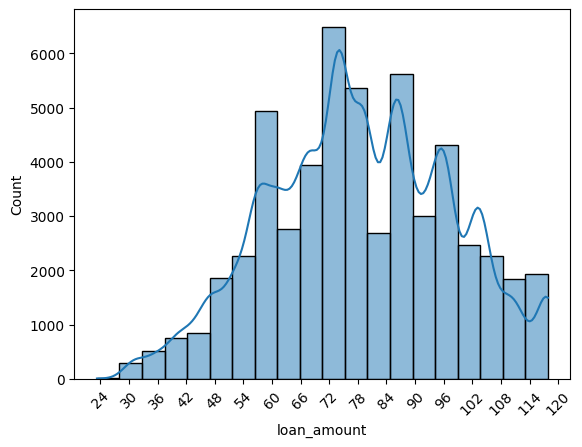

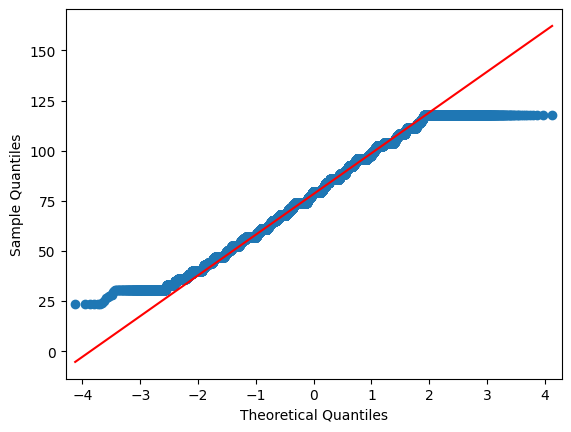

funded_amount: skew = -0.041
funded_amount: K^2 test statistic = 1020.528, p = 0.000


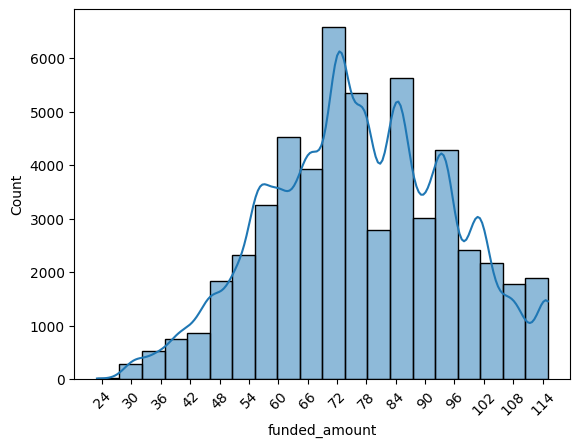

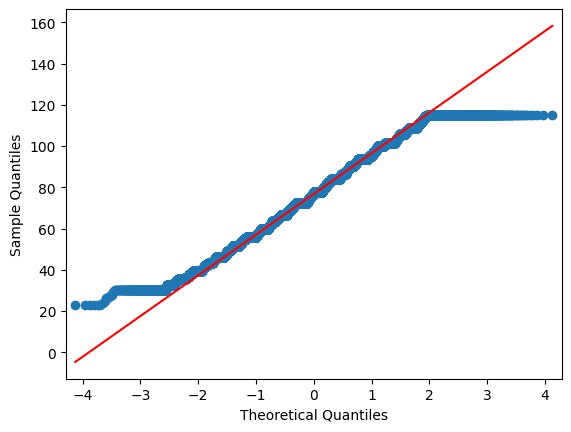

funded_amount_inv: skew = -0.035
funded_amount_inv: K^2 test statistic = 287.636, p = 0.000


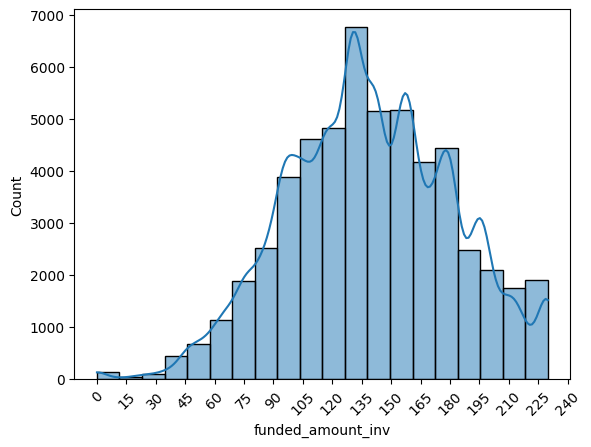

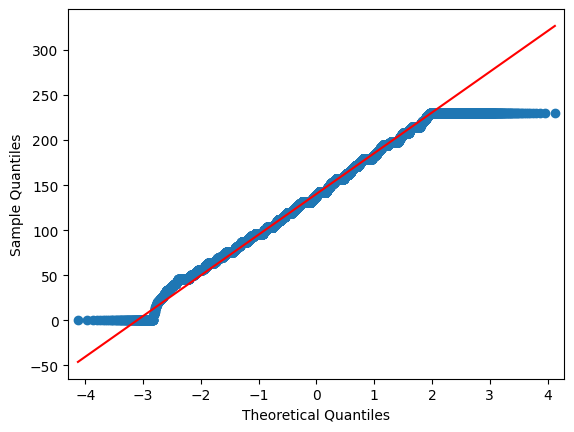

instalment: skew = -0.021
instalment: K^2 test statistic = 203.326, p = 0.000


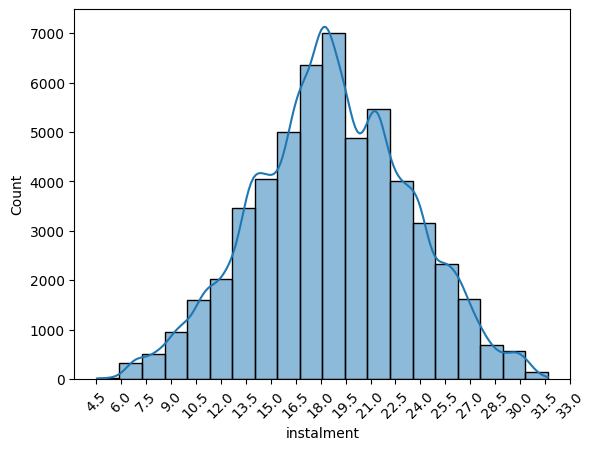

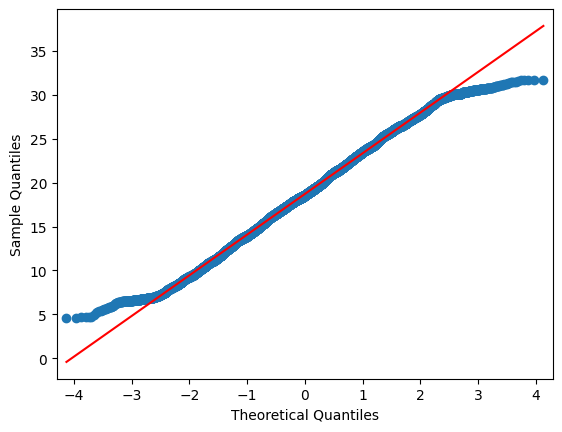

annual_inc: skew = -0.012
annual_inc: K^2 test statistic = 1212.526, p = 0.000


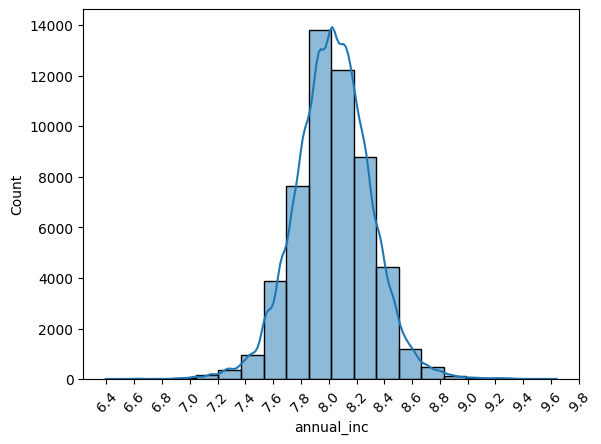

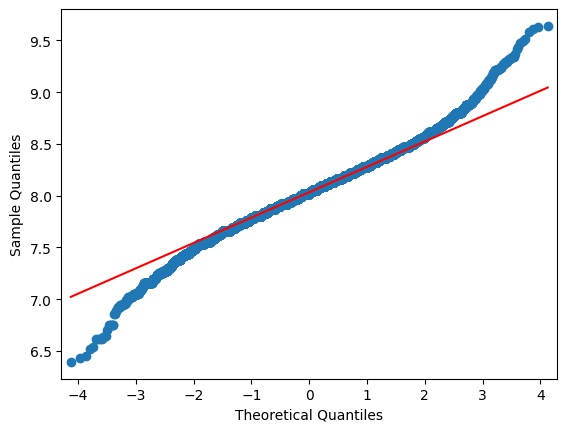

open_accounts: skew = 0.006
open_accounts: K^2 test statistic = 42.519, p = 0.000


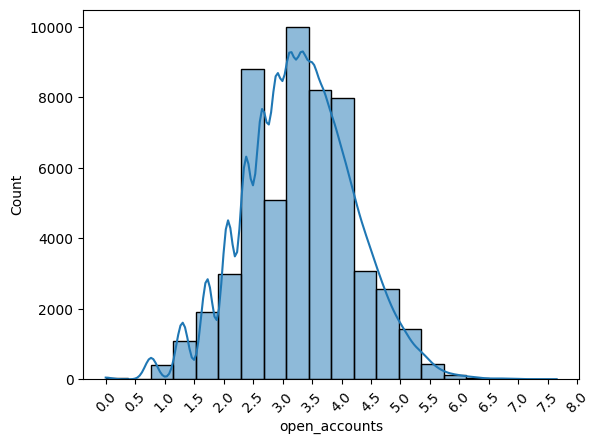

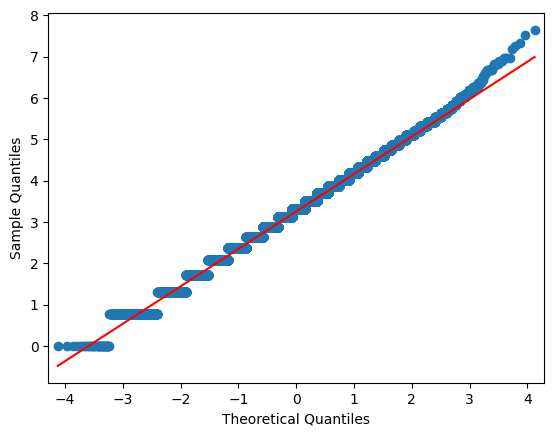

total_accounts: skew = -0.013
total_accounts: K^2 test statistic = 65.419, p = 0.000


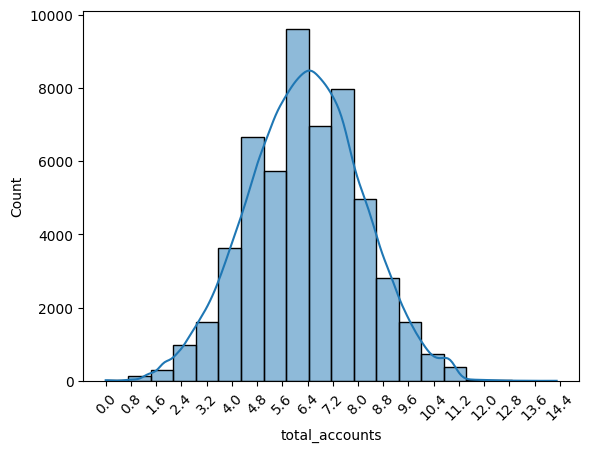

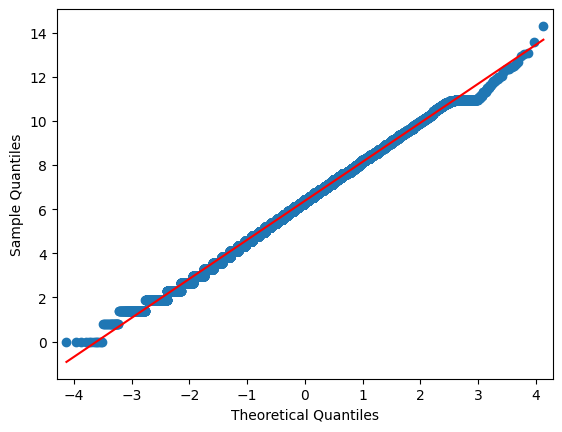

total_payment: skew = -0.004
total_payment: K^2 test statistic = 29.651, p = 0.000


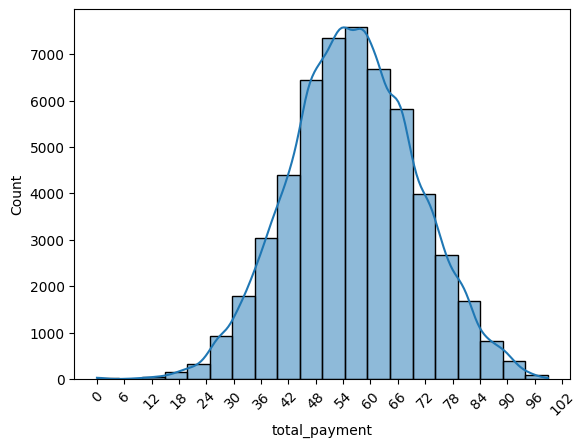

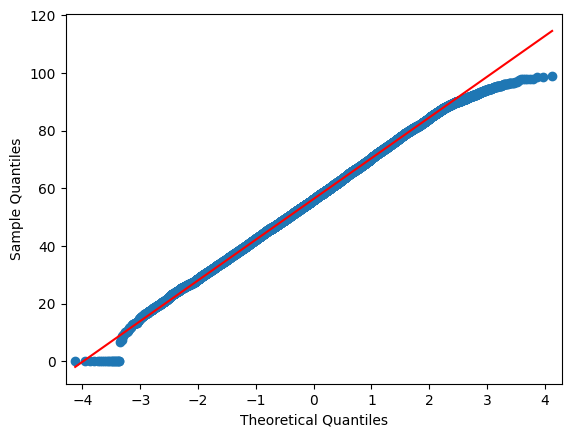

total_payment_inv: skew = 0.006
total_payment_inv: K^2 test statistic = 2.682, p = 0.262


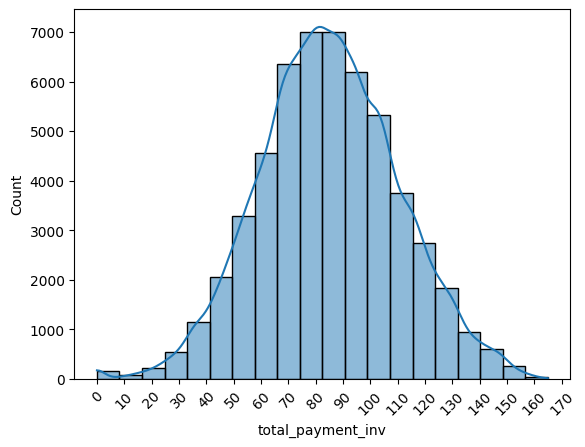

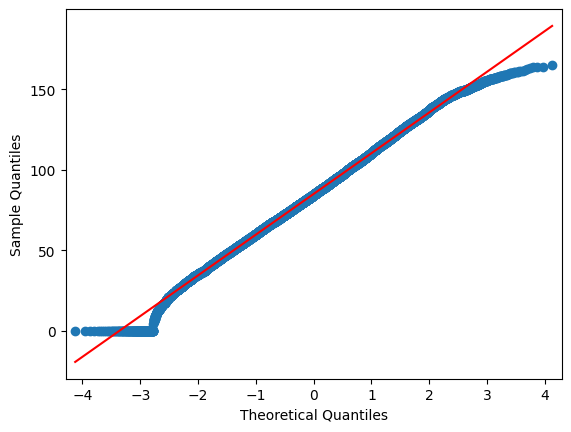

total_rec_prncp: skew = -0.004
total_rec_prncp: K^2 test statistic = 37.865, p = 0.000


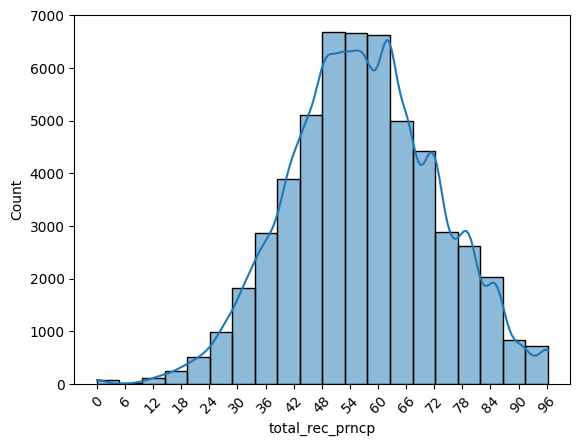

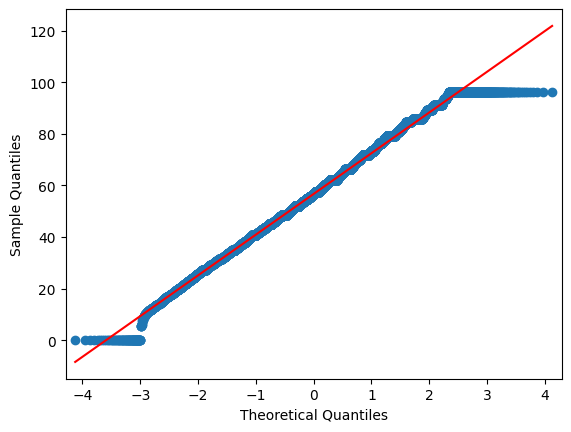

total_rec_int: skew = 0.021
total_rec_int: K^2 test statistic = 62.945, p = 0.000


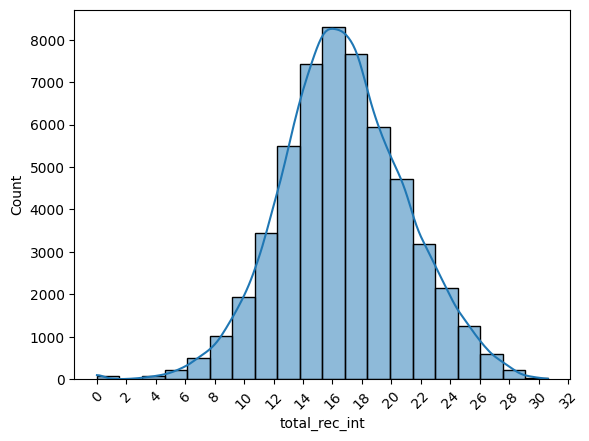

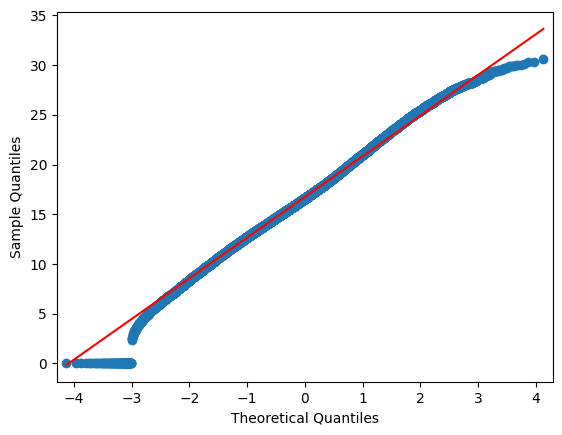

last_payment_amount: skew = -0.002
last_payment_amount: K^2 test statistic = 82.761, p = 0.000


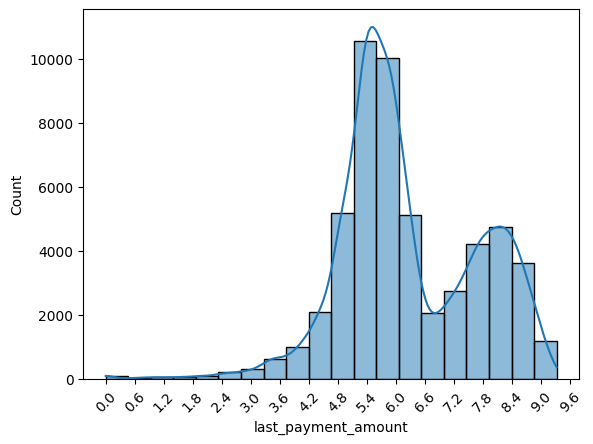

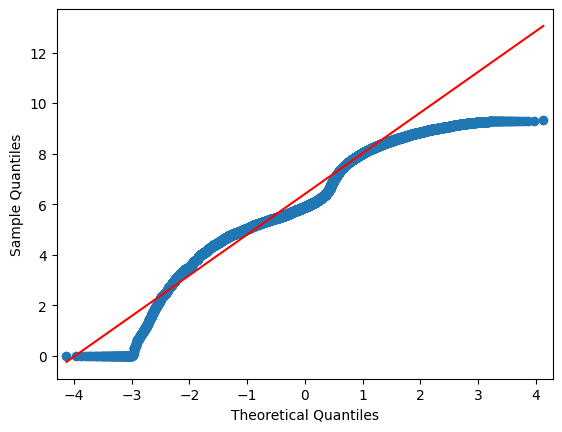

inq_last_6mths: skew = 1.969
inq_last_6mths: K^2 test statistic = 19884.866, p = 0.000


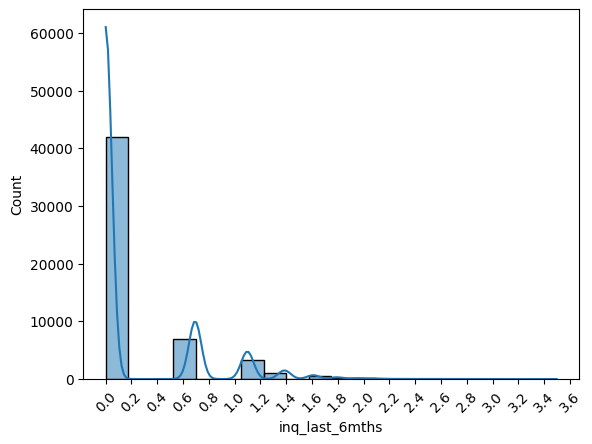

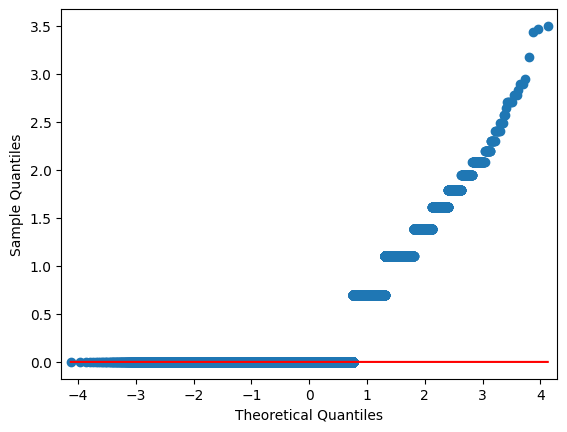

In [8]:
# Run skew checks
loans_skew = plots.SkewChecker(loans)
for col in cols_transform:
    loans_skew.skew_check(col)

## Outlier review

In [ ]:
# Create instance of the Plotter class
loans_plots = plots.Plotter(loans)
